# Real-Valued feature extraction and matching
- In 10.10, different ways of finding keypoints was discussed and last three lessons was on feature extraction based on the keypoints in the image.
- This lesson is based on feature matching
- Used in object identification, spatial verification

## Objectives of the lesson:
- Extract keypoints and local invariant descriptors from two images that contain the same object, but are captured using different camera sensors and under varying lighting conditions and viewing angles.
- Apply feature matching to match keypoints and descriptors from image #1 with the keypoints and descriptors in image 2
- Learn about David Lowe's ratio test for efficient feature matching.

In [1]:
import sys
sys.path.append("../../")

In [2]:
import numpy as np
import cv2
from imutils.feature.factories import FeatureDetector_create, DescriptorExtractor_create, DescriptorMatcher_create
from cv_imshow import display_image

In [3]:
args = {
    #path to first image we are going to extract keypoints and feature vectors from.
    "first_image":"../../images/jp_01.png",
    
    #path to seond image we are going to extract keypoints and feature vectors from.
    "second_image":"../../images/jp_02.png",
    
    #The keypoint detector that will be used to perform keypoint detection on both images.
    "detector":"SURF",
    
    #Descriptor to extract feaature vector for extracted keypoints
    "extractor":"SIFT",
    
    #process used to match feature vector corresponding to keypoints in the two images
    "matcher":"BruteForce",
    
    "visualize":"Yes"
}

In [4]:
def feature_matching(f_image, s_image, detector, extractor, matcher, visualize):
    #init feature detector
    if detector=="DOG":
        detector = FeatureDetector_create("SIFT")
    elif detector=="FASTHESSIAN":
        detector = FeatureDetector_create("SURF")
    else:
        detector = FeatureDetector_create(detector)

    #init feature extractor
    extractor = DescriptorExtractor_create(extractor)
    
    #init keypoint matcher
    matcher = DescriptorMatcher_create(matcher)
    
    #load and convert images to gray
    imageA = cv2.imread(f_image)
    imageB = cv2.imread(s_image)
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
    
    #detect keypoints in two images.
    kpsA = detector.detect(grayA)
    kpsB = detector.detect(grayB)
    
    #extract features from each of keypoints regions in images.
    (kpsA, featuresA) = extractor.compute(grayA, kpsA)
    (kpsB, featuresB) = extractor.compute(grayB, kpsB)
    
    
    # match the keypoints using the Euclidean distance and initialize
    # the list of actual matches
    rawMatches = matcher.knnMatch(featuresA, featuresB, 2)
    matches = []

    if rawMatches is not None:
        # loop over the raw matches
        for m in rawMatches:
            # ensure the distance passes David Lowe's ratio test
            #test rejects poor matches by computing the ratio between 
            #the best and second-best match. 
            # If the ratio is above some threshold, 
            # the match is discarded as being low quality
            if len(m) == 2 and m[0].distance < m[1].distance * 0.8:
                matches.append((m[0].trainIdx, m[0].queryIdx))

        # show some diagnostic information
        print("# of keypoints from first image: {}".format(len(kpsA)))
        print("# of keypoints from second image: {}".format(len(kpsB)))
        print("# of matched keypoints: {}".format(len(matches))) 
        
        #init the output visualization image
        (hA, wA) = imageA.shape[:2]
        (hB, wB) = imageB.shape[:2]
        vis = np.zeros((max(hA, hB), wA+wB, 3), dtype="uint8")
        vis[0:hA,0:wA] = imageA
        vis[0:hB, wA:] = imageB
        
        #loop over matches
        for (trainIdx, queryIdx) in matches:
            #gen a random color and draw match
            color = np.random.randint(0, high=255, size=(3,))
            color = tuple(map(int, color))
            ptA = (int(kpsA[queryIdx].pt[0]), int(kpsA[queryIdx].pt[1]))
            ptB = (int(kpsB[queryIdx].pt[0]), int(kpsB[queryIdx].pt[1]))
            cv2.line(vis, ptA, ptB, color, 2)
            
            #check to see if each match should be visualized individually
            if visualize=="Each":
                display_image("Matched", vis)
                sleep(0.5)
        
        if visualize=="Yes":
            display_image("Matched", vis)

# of keypoints from first image: 691
# of keypoints from second image: 1536
# of matched keypoints: 90


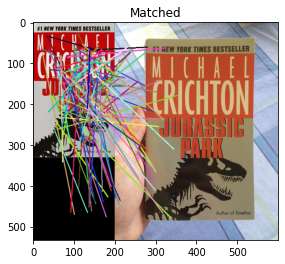

In [6]:
feature_matching(args["first_image"], args["second_image"], 
                 "SURF", "RootSIFT", args["matcher"], args["visualize"])